In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
data = pd.read_excel("2021MCMProblemC_DataSet.xlsx")

In [16]:
data.dtypes

GlobalID                   object
Detection Date             object
Notes                      object
Lab Status                 object
Lab Comments               object
Submission Date    datetime64[ns]
Latitude                  float64
Longitude                 float64
dtype: object

# 清洗数据
# Lab Status分类、groundBy分类
# Knn聚类分析、cv最小包络圆
# 时空特征分析

## 清洗数据
### 删除无明确Detection Date
### 删除时间过久的案例
### 格式化时间

In [4]:
data.columns

Index(['GlobalID', 'Detection Date', 'Notes', 'Lab Status', 'Lab Comments',
       'Submission Date', 'Latitude', 'Longitude'],
      dtype='object')

In [17]:
data = data[data['Detection Date'] != '<Null>']

for i in [2909,338,344,367,398,499,616,676,4345,1366,355]:
    data = data.drop([i],axis=0)
    print(i)
index = []
for i in range(len(data)):
        index.append(i)
data.index = pd.Series(index)

2909
338
344
367
398
499
616
676
4345
1366
355


In [18]:
for i in [1369,356]:
    data = data.drop([i],axis=0)

In [19]:
data_pos = data[data["Lab Status"] == "Positive ID"]
data_neg = data[data["Lab Status"] == "Negative ID"]
data_unprocess = data[data["Lab Status"] == "Unprocessed"]
data_unvery = data[data["Lab Status"] == "Unverified"]

In [20]:
data['Detection Date'] = pd.to_datetime(data['Detection Date'])

In [21]:
data.to_csv('origin_data_cleaning_1.csv')

In [22]:
data.dtypes

GlobalID                   object
Detection Date     datetime64[ns]
Notes                      object
Lab Status                 object
Lab Comments               object
Submission Date    datetime64[ns]
Latitude                  float64
Longitude                 float64
dtype: object

In [23]:
data_un_neg = data[data["Lab Status"] != "Negative ID"]

In [24]:
data_un_neg_by_year = data_un_neg.groupby(data_un_neg['Detection Date'].dt.year)

In [34]:
data_2019 = data_un_neg_by_year.get_group(2019)

No handles with labels found to put in legend.


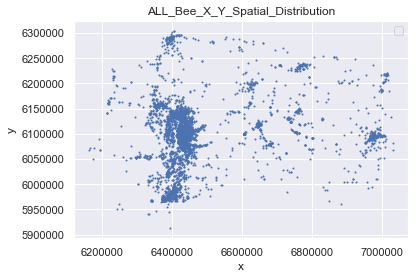

In [228]:
plt.scatter(data['x'],data['y'],color='b',s=1)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('ALL_Bee_X_Y_Spatial_Distribution')
plt.savefig('ALL_Bee_X_Y_Spatial_Distribution.jpg')
plt.show()

In [56]:
data_un_neg_by_year.groups

{1980: Int64Index([245], dtype='int64'),
 2007: Int64Index([2109], dtype='int64'),
 2010: Int64Index([392, 4189], dtype='int64'),
 2011: Int64Index([214, 238, 372, 410, 472, 604, 2708], dtype='int64'),
 2012: Int64Index([175, 193, 1317, 4241], dtype='int64'),
 2013: Int64Index([680, 681], dtype='int64'),
 2014: Int64Index([550], dtype='int64'),
 2015: Int64Index([45, 286, 546, 4419, 4420], dtype='int64'),
 2016: Int64Index([16, 21, 149, 290, 311, 717], dtype='int64'),
 2017: Int64Index([97, 168, 477], dtype='int64'),
 2018: Int64Index([20, 32, 40, 59, 73, 227, 377, 385, 482, 533, 541, 779, 4348], dtype='int64'),
 2019: Int64Index([   0,    1,    3,    4,    5,   10,   17,   22,   34,   35,
             ...
             1010, 1015, 1020, 1059, 1248, 1253, 2351, 2443, 3101, 3891],
            dtype='int64', length=107),
 2020: Int64Index([   2,    7,   11,   13,   15,   23,   24,   25,   26,   28,
             ...
             4414, 4415, 4416, 4417, 4418, 4421, 4422, 4423, 4424, 4425],


In [107]:
def year_every_type_plot(data__,use_mounth):
    Index = list(data__.size().index)
    for i in Index:
        data1 = data__.get_group(2019)
        if use_mounth:
            data_year_month = data1.groupby(data1['Detection Date'].dt.mounth)
        index2 = 
        data_negative = data[data['Lab Status'] =='Negative ID']
        data_positive = data[data['Lab Status'] =='Positive ID']
        data_unprocessed = data[data['Lab Status'] =='Unprocessed']
        data_unverified = data[data['Lab Status'] =='Unverified']

        plt.scatter(data_unverified['Longitude'],data_unverified['Latitude'],color='g',marker='+',s=10)
        plt.scatter(data_negative['Longitude'],data_negative['Latitude'],color='b',marker='v',s=10)
        plt.scatter(data_positive['Longitude'],data_positive['Latitude'],color='r',marker='D',s=30)
        plt.scatter(data_unprocessed['Longitude'],data_unprocessed['Latitude'],color='y',marker='o')

        plt.legend(['Unverified','Negative ID','Positive ID','Unprocessed'],)
        plt.title(str(i)+'_year_'+'Bee_Spatial_Distribution')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.savefig(('year_very_type_data_jpg/%d_year_'+'Bee_Spatial_Distribution.jpg')%i)
        plt.show()
       

SyntaxError: invalid syntax (<ipython-input-107-de67f8ced718>, line 7)

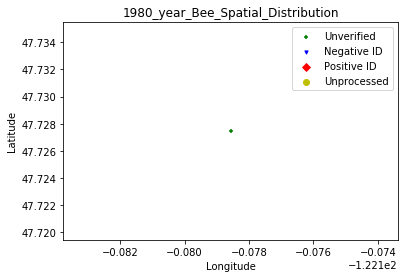

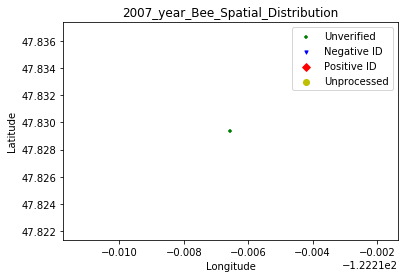

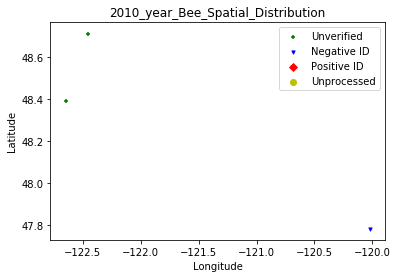

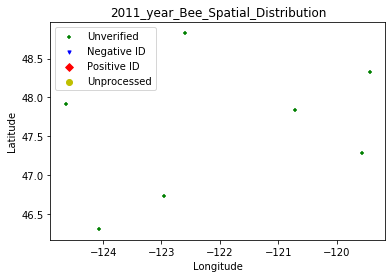

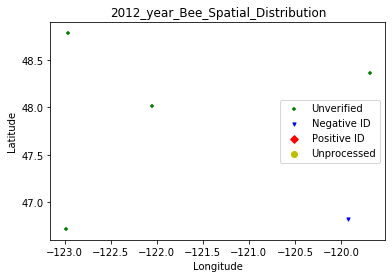

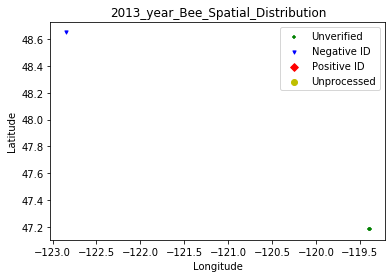

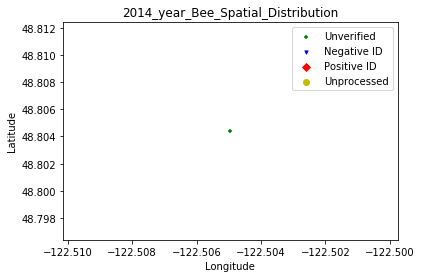

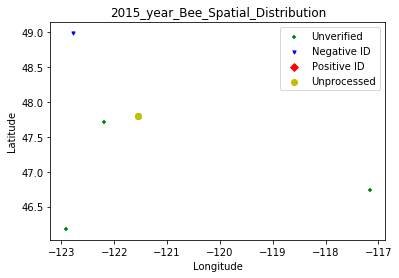

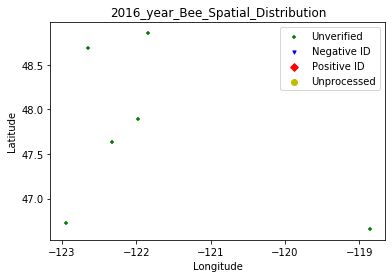

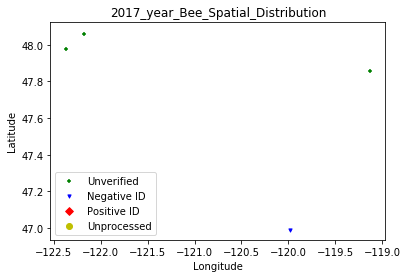

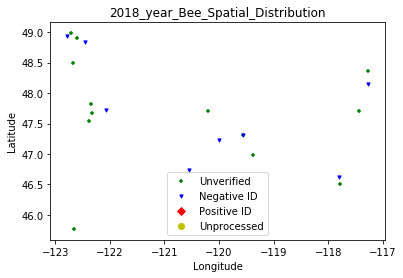

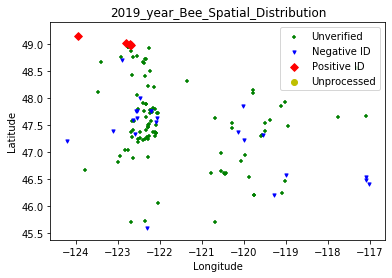

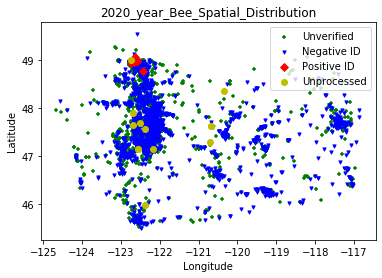

In [79]:
data_by_year = data.groupby(data['Detection Date'].dt.year)
year_every_type_plot(data_by_year)

In [85]:
data_by_year.size()

Detection Date
1980       1
2007       1
2010       3
2011       7
2012       5
2013       3
2014       1
2015       6
2016       6
2017       4
2018      21
2019     130
2020    4236
dtype: int64

In [115]:
def year_month_every_type_plot(data__):
    
    data1 = data__.get_group(2020)
    data_year_month = data1.groupby(data1['Detection Date'].dt.month)
    Index = list(data_year_month.size().index)
    for i in Index:
        
        data = data_year_month.get_group(i)
        data_negative = data[data['Lab Status'] =='Negative ID']
        data_positive = data[data['Lab Status'] =='Positive ID']
        data_unprocessed = data[data['Lab Status'] =='Unprocessed']
        data_unverified = data[data['Lab Status'] =='Unverified']

        plt.scatter(data_unverified['Longitude'],data_unverified['Latitude'],color='g',marker='+',s=10)
        plt.scatter(data_negative['Longitude'],data_negative['Latitude'],color='b',marker='v',s=10)
        plt.scatter(data_positive['Longitude'],data_positive['Latitude'],color='r',marker='D',s=30)
        plt.scatter(data_unprocessed['Longitude'],data_unprocessed['Latitude'],color='y',marker='o')

        plt.legend(['Unverified','Negative ID','Positive ID','Unprocessed'],)
        plt.title('2020_'+str(i)+'_month_'+'Bee_Spatial_Distribution')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.savefig(('year_month_very_type_data_jpg/2020-%d_month_'+'Bee_Spatial_Distribution.jpg')%i)
        plt.show()

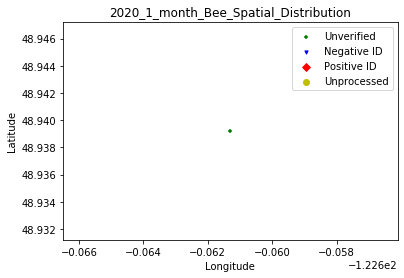

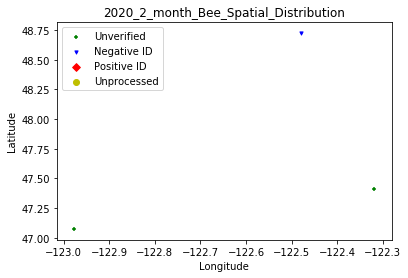

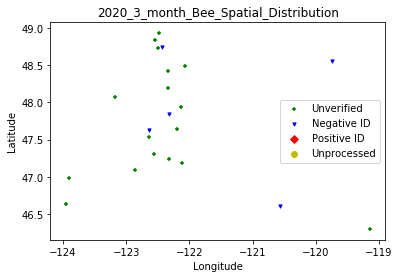

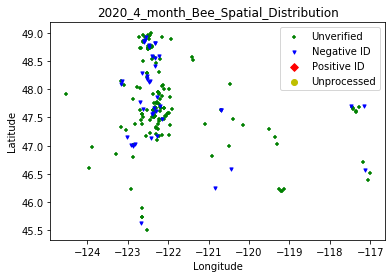

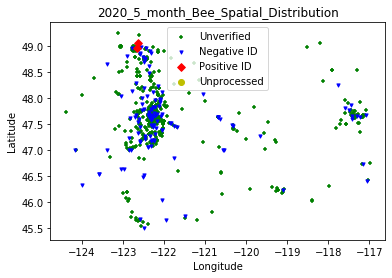

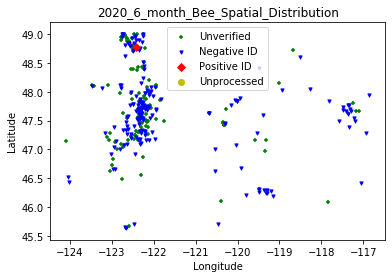

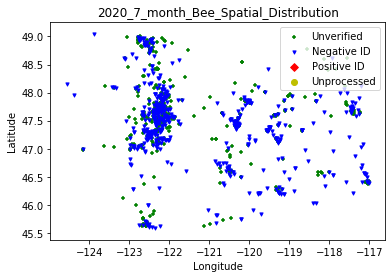

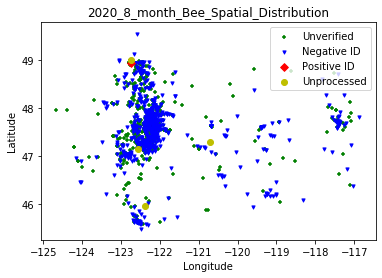

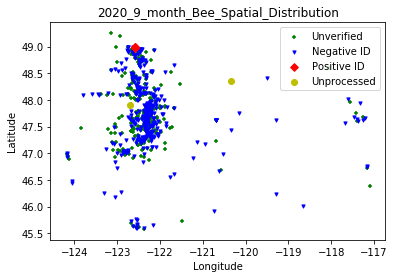

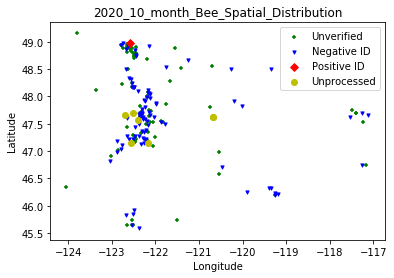

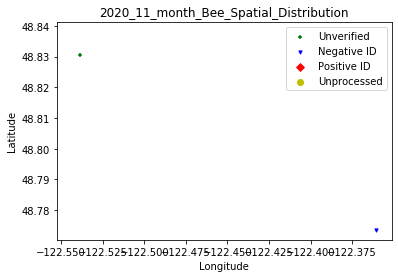

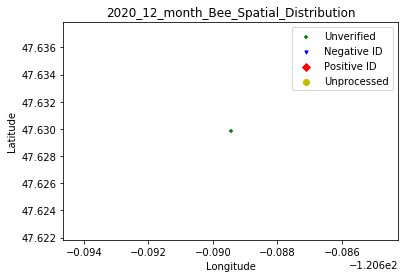

In [116]:
data_by_year = data.groupby(data['Detection Date'].dt.year)
year_month_every_type_plot(data_by_year)

In [122]:
data_pos = data_pos.sort_values(by='Detection Date')
index = []
for i in range(len(data_pos)):
        index.append(i)
data_pos.index = pd.Series(index)
data_pos

,GlobalID,Detection Date,Notes,Lab Status,Lab Comments,Submission Date,Latitude,Longitude
0,{124B9BFA-7F7B-4B8E-8A56-42E067F0F72E},2019-09-19 00:00:00,This was the colony that was found and destroy...,Positive ID,"Thanks for adding this, and the great pictures!",2020-02-04,49.149394,-123.943134
1,{7F3B6DB6-2ED4-4415-8DC2-3F03EC88F353},2019-09-30 00:00:00,Insects observed late Sept or early Oct,Positive ID,"Thank you for contacting us with photographs, ...",2020-06-15,48.993892,-122.702242
2,{5EAD3364-2CA7-4A39-9A53-7F9DCF5D2041},2019-10-30 00:00:00,Hornet specimen sent to WSU,Positive ID,,2020-01-15,48.971949,-122.700941
3,{F1864CC3-508C-4E60-9098-B158AB413B03},2019-11-13 00:00:00,,Positive ID,"Photograph only, confirmed by provincial gover...",2020-06-01,49.025831,-122.810653
4,{5AC8034E-5B46-4294-85F0-5B13117EBEFE},2019-12-08 00:00:00,"One dead wasp seen in Blaine, and suspect flyi...",Positive ID,,2020-01-15,48.980994,-122.688503
5,{1C6D0EAB-F68D-411D-974E-1233618854CC},2020-05-15 00:00:00,Specimen collected by citizen scientist and re...,Positive ID,Added by WSDA,2020-06-05,49.060215,-122.641648
6,{AD56E8D0-CC43-45B5-B042-94D1712322B9},2020-05-27 00:00:00,,Positive ID,Specimen collected and verified by WSDA and US...,2020-05-27,48.955587,-122.661037
7,{FC6E894B-F6DF-4FDC-853A-D7372D253988},2020-06-07 00:00:00,,Positive ID,Thank you for submitting this depressing sight...,2020-06-12,48.777534,-122.418612
8,{A717D86F-23E9-4C8C-9F12-198A71113E93},2020-08-17 00:00:00,"Spotted at outdoor dining in Birch Bay, posted...",Positive ID,,2020-08-24,48.927519,-122.745016
9,{2138197A-F5CF-4308-93E2-62EA6F84D098},2020-09-21 00:00:00,"We caught and killed 2, 2nd on September 25th",Positive ID,"Thank you for submitting this important find, ...",2020-09-26,48.984269,-122.574809


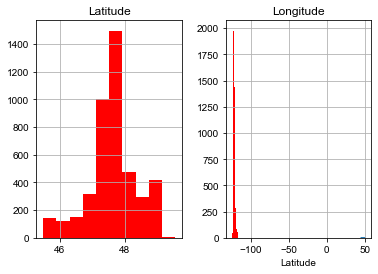

In [148]:
data.hist(color='r')
sns.set(color_codes=True)
sns.distplot(data['Latitude'],bins=15)
plt.savefig('ALL_Bee_Spatial_Hist.jpg')
plt.show()

In [191]:
data_dis_temp = data_pos[['Latitude','Longitude','Detection Date']]
data_dis_temp

,Latitude,Longitude,Detection Date
0,49.149394,-123.943134,2019-09-19 00:00:00
1,48.993892,-122.702242,2019-09-30 00:00:00
2,48.971949,-122.700941,2019-10-30 00:00:00
3,49.025831,-122.810653,2019-11-13 00:00:00
4,48.980994,-122.688503,2019-12-08 00:00:00
5,49.060215,-122.641648,2020-05-15 00:00:00
6,48.955587,-122.661037,2020-05-27 00:00:00
7,48.777534,-122.418612,2020-06-07 00:00:00
8,48.927519,-122.745016,2020-08-17 00:00:00
9,48.984269,-122.574809,2020-09-21 00:00:00


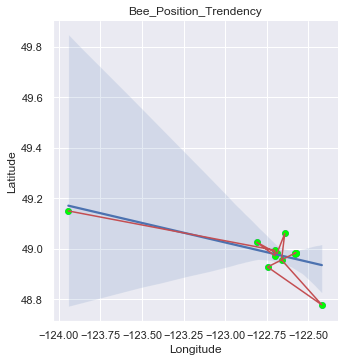

In [192]:
sns.lmplot(x='Longitude',y='Latitude',data=data_dis_temp,col_order='red')
plt.scatter(data_dis_temp['Longitude'],data_dis_temp['Latitude'],c='lime',s=30)
plt.plot(data_dis_temp['Longitude'],data_dis_temp['Latitude'],c='r')
plt.title('Bee_Position_Trendency')
plt.savefig('Bee_Position_Trendency.jpg')

In [182]:
import math
def getDistance(latA, lonA, latB, lonB):

    ra = 6378140 # 赤道半径

    rb = 6356755 # 极半径

    flatten = (ra - rb) / ra # Partial rate of the earth

    # change angle to radians

    radLatA = math.radians(latA)

    radLonA = math.radians(lonA)

    radLatB = math.radians(latB)

    radLonB = math.radians(lonB)

    pA = math.atan(rb / ra * math.tan(radLatA))

    pB = math.atan(rb / ra * math.tan(radLatB))

    x = math.acos(math.sin(pA) * math.sin(pB) + math.cos(pA) * math.cos(pB) * math.cos(radLonA - radLonB))

    c1 = (math.sin(x) - x) * (math.sin(pA) + math.sin(pB)) ** 2 / math.cos(x / 2) ** 2

    c2 = (math.sin(x) + x) * (math.sin(pA) - math.sin(pB)) ** 2 / math.sin(x / 2) ** 2

    dr = flatten / 8 * (c1 - c2)

    distance = ra * (x + dr)

    distance = round(distance / 1000, 4)

    return distance


In [183]:
distance = []
index = []
for i in range(14):

    latA = data_dis_temp['Latitude'][i]
    lonA = data_dis_temp['Longitude'][i]
    if i +1 < 14:
        latB = data_dis_temp['Latitude'][i+1]
        lonB = data_dis_temp['Longitude'][i+1]
    else:
        break
    
    distance.append(getDistance(latA,lonA,latB,lonB))
    index.append(i)

In [184]:
print(distance)

[92.3014, 2.4421, 10.0177, 10.2342, 9.4532, 11.7218, 26.616, 29.1889, 13.9719, 0.0082, 0.0054, 0.7105, 0.4391]


In [190]:
data_distance = pd.Series(data=distance,index=index)
data_distance = data_distance.to_frame()
data_distance.columns = ['Distance']


,Distance
0,92.3014
1,2.4421
2,10.0177
3,10.2342
4,9.4532
5,11.7218
6,26.6160
7,29.1889
8,13.9719
9,0.0082


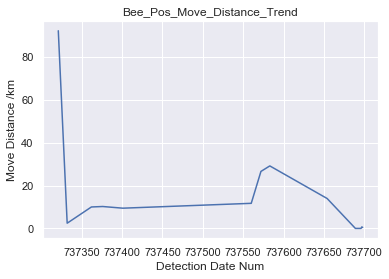

In [209]:
import matplotlib.dates as mdates
data_distance['Detection Date'] = data_dis_temp['Detection Date']
#data_distance['Detection Date'] = pd.to_datetime(data_distance['Detection Date'],format=r"%Y-%m-%d")
plt.plot(data_distance['Detection Date'].map(lambda x : mdates.date2num(x)),data_distance['Distance'],c='b')
plt.title('Bee_Pos_Move_Distance_Trend')
plt.xlabel('Detection Date Num')
plt.ylabel('Move Distance /km')
plt.savefig('Bee_Pos_Move_Distance_Trend.jpg')

In [203]:
data_distance['Detection Num'] = data_distance['Detection Date'].map(lambda x : mdates.date2num(x))
data_distance.to_csv('bee_pos_distance_date.csv')

In [207]:
data_distance

,Distance,Detection Date,Detection Num
0,92.3014,2019-09-19 00:00:00,737321.0
1,2.4421,2019-09-30 00:00:00,737332.0
2,10.0177,2019-10-30 00:00:00,737362.0
3,10.2342,2019-11-13 00:00:00,737376.0
4,9.4532,2019-12-08 00:00:00,737401.0
5,11.7218,2020-05-15 00:00:00,737560.0
6,26.6160,2020-05-27 00:00:00,737572.0
7,29.1889,2020-06-07 00:00:00,737583.0
8,13.9719,2020-08-17 00:00:00,737654.0
9,0.0082,2020-09-21 00:00:00,737689.0


In [220]:
import math
def millerToXY (lon, lat):
    """
    :param lon: 经度
    :param lat: 维度
    :return:
    """
    xy_coordinate = []
    L = 6381372*math.pi*2    #地球周长
    W = L                    #平面展开，将周长视为X轴
    H = L/2                  #Y轴约等于周长一般
    mill = 2.3               #米勒投影中的一个常数，范围大约在正负2.3之间  
    x = lon*math.pi/180      #将经度从度数转换为弧度
    y = lat*math.pi/180      #将纬度从度数转换为弧度 
    y = 1.25*math.log(math.tan(0.25*math.pi+0.4*y))  #这里是米勒投影的转换 
    
    # 这里将弧度转为实际距离 ，转换结果的单位是公里
    x = (W/2)+(W/(2*math.pi))*x
    y = (H/2)-(H/(2*mill))*y
    xy_coordinate.append((int(round(x)),int(round(y))))
    return int(round(x)),int(round(y))


value_x = []
value_y = []
index = []
for i in range(4424):
    x,y= (millerToXY(data['Longitude'][i],data['Latitude'][i]))

    value_x.append(x)
    value_y.append(y)
    index.append(i)


In [225]:
data['x'] = value_x
data['y'] = value_y
data.head()
data.to_csv('origin_date_x_y_data_2.csv')

In [ ]:
import folium as fmap